# Clustering Crypto

In [44]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [45]:
# Load the crypto_data.csv dataset.
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [46]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df.IsTrading == True]
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [47]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(['IsTrading'], axis=1)
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [48]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [49]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [50]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_name_df = crypto_df[['CoinName']]
crypto_name_df.head(10)

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic
ZEC,ZCash


In [51]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(['CoinName'], axis=1)
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [52]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [54]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca_df = pca.fit_transform(X_scaled)
crypto_pca_df

array([[-0.31655191,  0.96669356, -0.57678078],
       [-0.29986512,  0.96660803, -0.57715371],
       [ 2.31491444,  1.58498928, -0.61628205],
       ...,
       [ 0.32092492, -2.29442088,  0.45457123],
       [-0.16823208, -1.91080185,  0.37788905],
       [-0.28575742,  0.79645183, -0.28918565]])

In [55]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(crypto_pca_df, columns=["PC 1", "PC 2", "PC 3"], index=X.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.316552,0.966694,-0.576781
404,-0.299865,0.966608,-0.577154
1337,2.314914,1.584989,-0.616282
BTC,-0.146577,-1.351396,0.179229
ETH,-0.183413,-1.791874,0.422210
LTC,-0.158409,-1.138594,-0.009846
DASH,-0.391465,1.205369,-0.524981
XMR,-0.153425,-2.222306,0.353795
ETC,-0.181852,-1.792004,0.422198
ZEC,-0.168231,-1.910802,0.377889


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

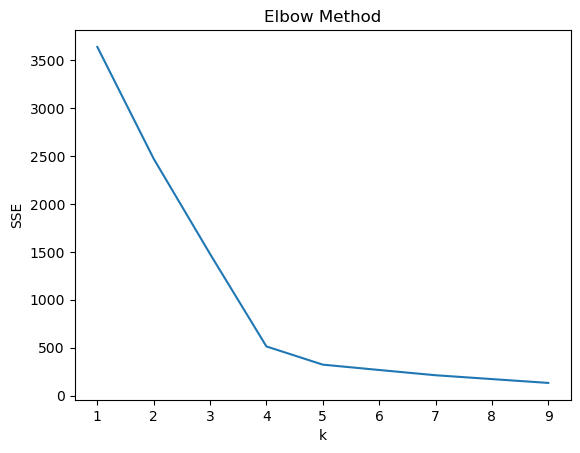

In [56]:
# Create an elbow curve to find the best value for K.
sse = {}
K = range(1, 10)

for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pcs_df)
    sse[k]= kmeanmodel.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Running K-Means with `k=4`

In [57]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)


# Fit the model
model.fit(pcs_df)


# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[3 3 3 0 0 0 3 0 0 0 3 0 3 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 3 0 3 0 0 3 3 0
 0 0 0 0 0 3 3 0 0 0 0 0 3 3 0 3 0 0 0 0 3 0 0 3 0 3 3 3 0 0 0 3 3 3 3 3 0
 0 0 3 3 0 3 0 3 3 0 0 0 0 3 3 0 3 0 0 3 3 0 3 3 0 0 3 3 0 3 3 0 3 0 3 0 3
 0 3 3 0 0 3 0 0 0 3 0 0 0 0 0 3 3 0 0 0 3 0 3 0 0 3 0 3 0 3 3 0 0 3 0 0 3
 3 0 3 0 3 3 3 0 0 0 0 3 3 3 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 0 3 0 3 3 0 3 0
 3 3 0 3 0 3 0 3 0 3 3 3 3 0 3 3 3 3 3 0 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 0 3 3 3 3 3 3 0 0 0 3 3 3 3 0 3 0 3 3 0 3 0 0 3 0 0 3 0 3 3 3 0 3 3 0
 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 3 0 3 0 0 0 0 3 0 3 3 0 3 0 0 0 3 0 3 0 0 0
 3 0 3 0 3 3 3 0 3 0 0 0 0 0 3 3 0 3 3 3 0 3 0 3 0 3 0 3 3 3 3 0 3 3 0 3 3
 3 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 0 3 0 0 0 3 0 0 3 3 3 0 0 0 3 3 3
 0 0 3 0 0 0 0 3 1 1 0 0 0 3 1 3 3 3 3 0 0 0 0 3 3 3 0 3 0 3 3 3 3 0 3 3 0
 3 3 0 0 3 0 3 0 0 0 0 3 3 0 3 0 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 0 3 0 0 0 0
 3 3 3 3 0 3 3 0 3 3 0 1 0 3 0 0 0 3 0 3 0 0 3 0 0 3 0 3 0 3 3 0 3 3 3 3 3
 0 0 0 3 3 3 0 3 0 3 0 3 

In [58]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_name_df

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_


# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.316552,0.966694,-0.576781,42 Coin,3
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.299865,0.966608,-0.577154,404Coin,3
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.314914,1.584989,-0.616282,EliteCoin,3
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.146577,-1.351396,0.179229,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.183413,-1.791874,0.422210,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.158409,-1.138594,-0.009846,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.391465,1.205369,-0.524981,Dash,3
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.153425,-2.222306,0.353795,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.181852,-1.792004,0.422198,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.168231,-1.910802,0.377889,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [59]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df, 
    x="PC 1", 
    y="PC 2", 
    z="PC 3", 
    color="Class", 
    symbol="Class", 
    hover_name="CoinName", 
    hover_data=["Algorithm"])
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [60]:
# Create a table with tradable cryptocurrencies.
tradable = clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 
                                              'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
tradable

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [61]:
# Print the total number of tradable cryptocurrencies.
tradable_count = clustered_df['CoinName'].count()
print(f"There are {tradable_count} tradable cryptocurrencies currently on the market.")

There are 532 tradable cryptocurrencies currently on the market.


In [62]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled_df = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
scaled_df

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [63]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data = scaled_df, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = pd.concat([plot_df, clustered_df['CoinName']], axis=1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.concat([plot_df, clustered_df['Class']], axis=1)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,3
404,5.320000e-04,0.001066,404Coin,3
1337,3.141593e-01,0.029576,EliteCoin,3
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,3
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [64]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x='TotalCoinsMined',
    y='TotalCoinSupply',
    hover=['CoinName'],
    by='Class')


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)